Part I

The data for this project is a set of 8x8 images of hand drawn digits (0 to 9). We first load the hand written digit data into the variable "digits." Then retrieve the feature vectors (X) and labels (Y) from "digits," and further split these into train and test sets. The test data makes up one fifth of the whole.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

tf.keras.backend.clear_session()

# load data
digits = load_digits(return_X_y=False, as_frame=False)

# split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(digits.data,
                                                    digits.target, test_size=0.2)

Define the model architecture. There are four layers. The first three have thirty two neurons and use Relu as their activation function. The output layer has ten neurons, one for each class, and uses softmax as its activation function. Then compile the model, using categorical cross entropy for the loss function.

In [ ]:
# define model architecture
model = tf.keras.Sequential([tf.keras.Input(shape=(X_train.shape[1])),
                             tf.keras.layers.Dense(32, activation = 'relu'),
                             tf.keras.layers.Dense(32, activation = 'relu'),
                             tf.keras.layers.Dense(32, activation = 'relu'),
                             tf.keras.layers.Dense(10, activation = 'softmax'),])


#compile model
model.compile(loss='categorical_crossentropy',
metrics=['accuracy'])

Convert the training labels from integers into a binary matrix. Then train the model for ten epochs.

As for the results of the training, each pass was close to a hundred percent accurate. The loss substantially decreased from .0648 in the first pass to .0174 on the last pass.

In [ ]:
# train model
Y_train_categorical = tf.keras.utils.to_categorical(Y_train)

model.fit(X_train, Y_train_categorical, epochs=10)

Epoch 1/10
45/45 [==============================] - 0s 2ms/step - loss: 0.0648 - accuracy: 0.9798
Epoch 2/10
45/45 [==============================] - 0s 2ms/step - loss: 0.0582 - accuracy: 0.9833
Epoch 3/10
45/45 [==============================] - 0s 2ms/step - loss: 0.0423 - accuracy: 0.9875
Epoch 4/10
45/45 [==============================] - 0s 2ms/step - loss: 0.0393 - accuracy: 0.9882
Epoch 5/10
45/45 [==============================] - 0s 2ms/step - loss: 0.0319 - accuracy: 0.9916
Epoch 6/10
45/45 [==============================] - 0s 2ms/step - loss: 0.0310 - accuracy: 0.9944
Epoch 7/10
45/45 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.9930
Epoch 8/10
45/45 [==============================] - 0s 2ms/step - loss: 0.0213 - accuracy: 0.9937
Epoch 9/10
45/45 [==============================] - 0s 2ms/step - loss: 0.0164 - accuracy: 0.9965
Epoch 10/10
45/45 [==============================] - 0s 2ms/step - loss: 0.0174 - accuracy: 0.9958


Next, evaluate the model on the training set. The loss is .0100 and the accuracy is .9986, which is excellent.

In [ ]:
# evaluate model on train set
train_loss, train_acc = model.evaluate(X_train, Y_train_categorical)

45/45 [==============================] - 0s 2ms/step - loss: 0.0100 - accuracy: 0.9986


Next, convert the test labels into a binary matrix. Then evaluate the model on the test data. The loss is about .08 higher than that of the training set. The accuracy is a little lower, but still excellent.

In [ ]:
# evaluate model on test set
Y_test_categorical = tf.keras.utils.to_categorical(Y_test)

test_loss, test_acc = model.evaluate(X_test, Y_test_categorical)

12/12 [==============================] - 0s 2ms/step - loss: 0.0913 - accuracy: 0.9750


Part II


Dump the weights and the biases from each of the four layers into W0, W1, W2, and W3. The weights are in W[0] and the biases are in W[1].

In [ ]:
W0 = model.layers[0].get_weights()

W1 = model.layers[1].get_weights()

W2 = model.layers[2].get_weights()

W3 = model.layers[3].get_weights()

Now to impliment forward propogation with Numpy. We first define the two activation functions, relu and softmax.

Then we feed forward through the model by cross multiplying the activations from the previous layer (a) with the current layer's weights (W) to get the preactivations (z). We then apply the activation function (relu or softmax) to get the output/activations for the layer (a). We return the output for the last layer (a3).

In [ ]:
def relu(z):
  return np.maximum(0, z)

def softmax(z):
  exp_z = np.exp(z)
  return exp_z / exp_z.sum()

def feedforward(x, W0, W1, W2, W3):
  z0 = np.dot(x, W0)
  a0 = relu(z0)
  z1 = np.dot(a0, W1)
  a1 = relu(z1)
  z2 = np.dot(a1, W2)
  a2 = relu(z2)
  z3 = np.dot(a2, W3)
  a3 = softmax(z3)
  return a3

def predict(x, W0, W1, W2, W3):
  a3 = feedforward(x, W0, W1, W2, W3)
  return a3

result = predict(digits.data, W0[0], W1[0], W2[0], W3[0])

Part III


Compute the accuracy of the numpy code. It's .994, which is higher than that of the Keras code for the test set.

In [ ]:
Y_categorical = tf.keras.utils.to_categorical(digits.target)

accuracy = tf.keras.metrics.CategoricalAccuracy(name="categorical_accuracy",
                                                dtype=None)

accuracy.update_state(Y_categorical, result)

print(f'Accuracy = {accuracy.result().numpy()}')

Accuracy = 0.9938786625862122


Next we want to display several images from each class of the output of the network. Since the "result" variable is a list of arrays which contain a probility distribution over the likelihood of an input belonging to each class, we first need to convert these to an array of the corresponding class integers. Then we loop through the original image data and display five images for each class, using our newly converted result array for indices. The output is what we wanted, five images of each digit.

<Figure size 432x288 with 0 Axes>

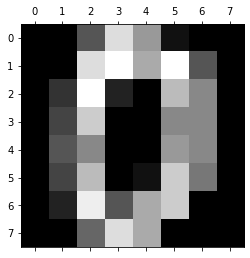

<Figure size 432x288 with 0 Axes>

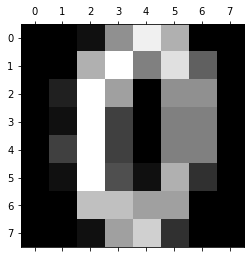

<Figure size 432x288 with 0 Axes>

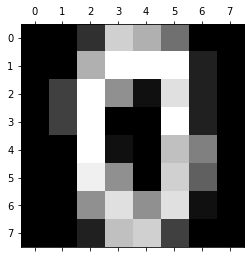

<Figure size 432x288 with 0 Axes>

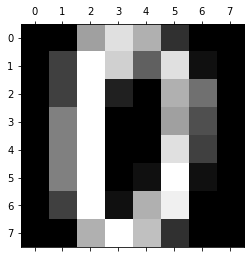

<Figure size 432x288 with 0 Axes>

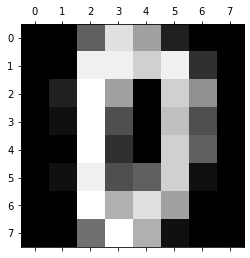

<Figure size 432x288 with 0 Axes>

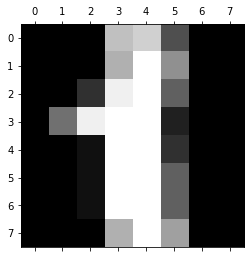

<Figure size 432x288 with 0 Axes>

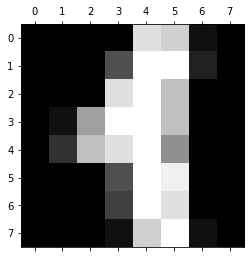

<Figure size 432x288 with 0 Axes>

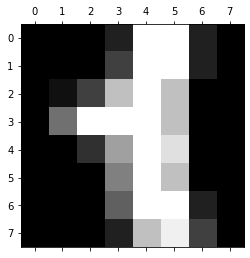

<Figure size 432x288 with 0 Axes>

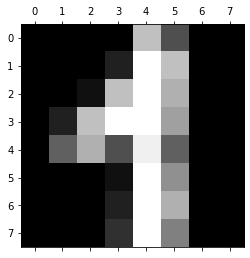

<Figure size 432x288 with 0 Axes>

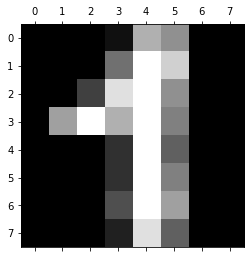

<Figure size 432x288 with 0 Axes>

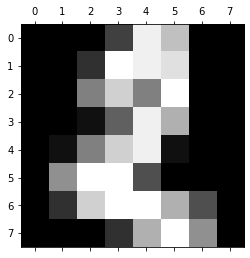

<Figure size 432x288 with 0 Axes>

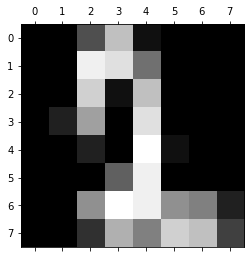

<Figure size 432x288 with 0 Axes>

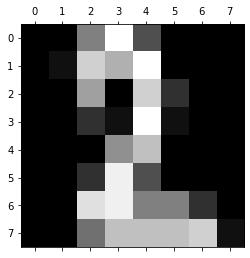

<Figure size 432x288 with 0 Axes>

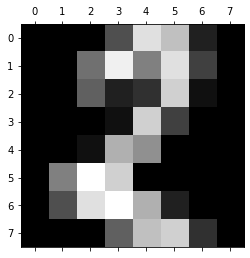

<Figure size 432x288 with 0 Axes>

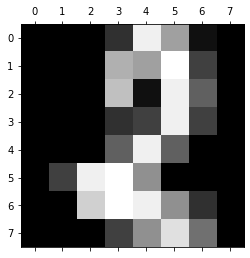

<Figure size 432x288 with 0 Axes>

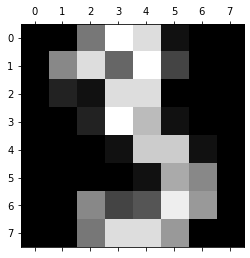

<Figure size 432x288 with 0 Axes>

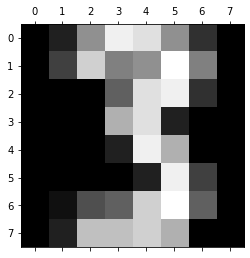

<Figure size 432x288 with 0 Axes>

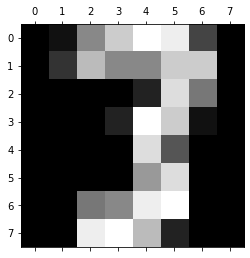

<Figure size 432x288 with 0 Axes>

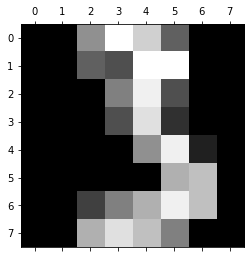

<Figure size 432x288 with 0 Axes>

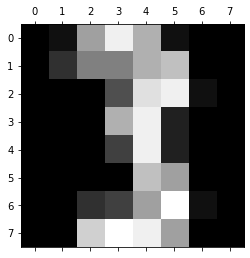

<Figure size 432x288 with 0 Axes>

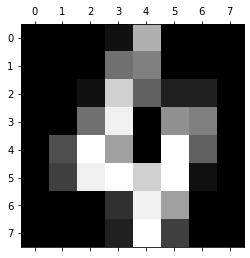

<Figure size 432x288 with 0 Axes>

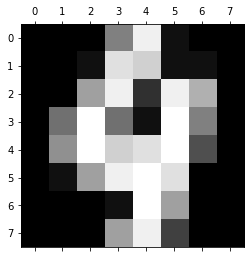

<Figure size 432x288 with 0 Axes>

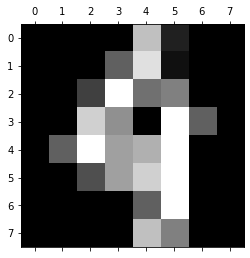

<Figure size 432x288 with 0 Axes>

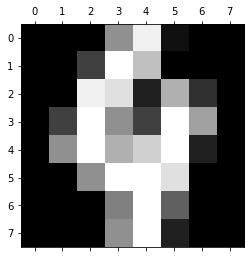

<Figure size 432x288 with 0 Axes>

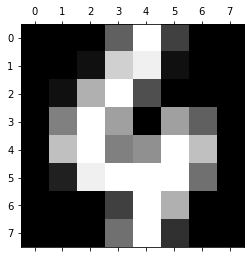

<Figure size 432x288 with 0 Axes>

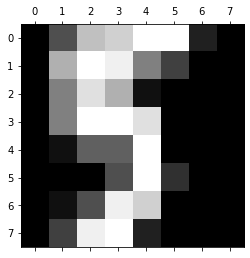

<Figure size 432x288 with 0 Axes>

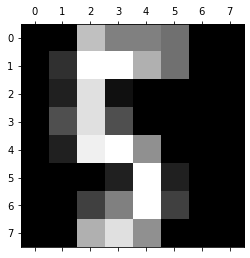

<Figure size 432x288 with 0 Axes>

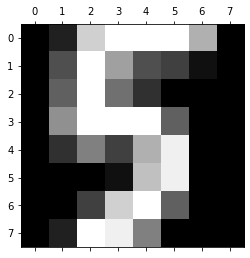

<Figure size 432x288 with 0 Axes>

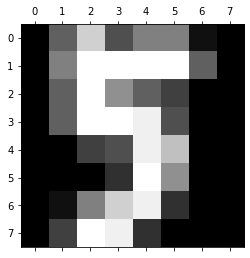

<Figure size 432x288 with 0 Axes>

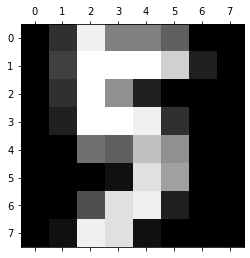

<Figure size 432x288 with 0 Axes>

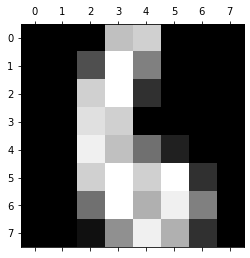

<Figure size 432x288 with 0 Axes>

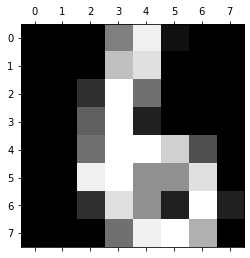

<Figure size 432x288 with 0 Axes>

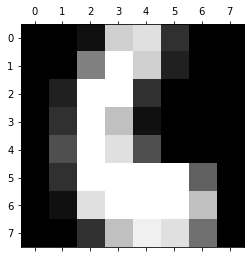

<Figure size 432x288 with 0 Axes>

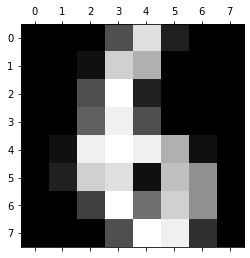

<Figure size 432x288 with 0 Axes>

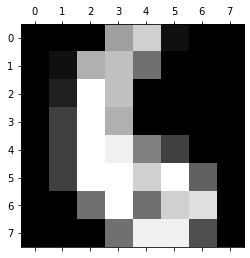

<Figure size 432x288 with 0 Axes>

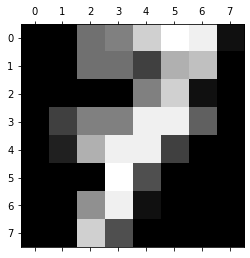

<Figure size 432x288 with 0 Axes>

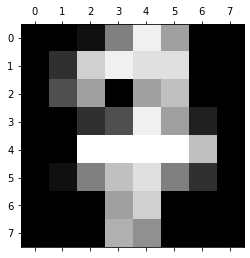

<Figure size 432x288 with 0 Axes>

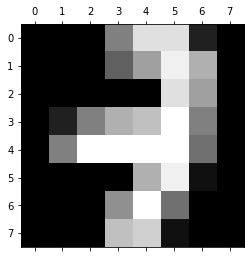

<Figure size 432x288 with 0 Axes>

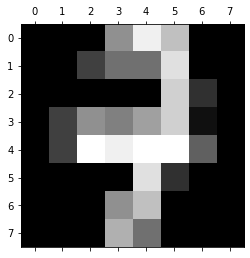

<Figure size 432x288 with 0 Axes>

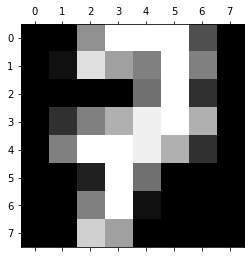

<Figure size 432x288 with 0 Axes>

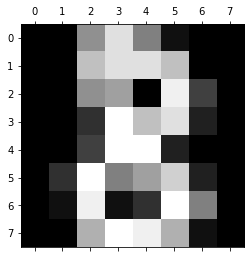

<Figure size 432x288 with 0 Axes>

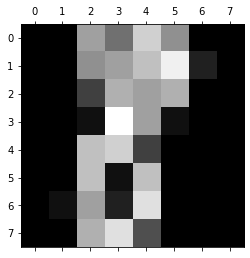

<Figure size 432x288 with 0 Axes>

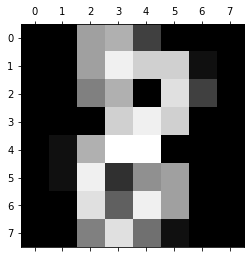

<Figure size 432x288 with 0 Axes>

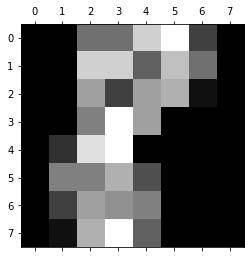

<Figure size 432x288 with 0 Axes>

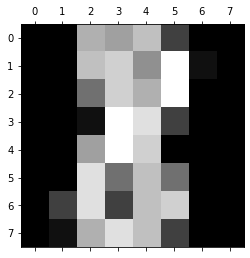

<Figure size 432x288 with 0 Axes>

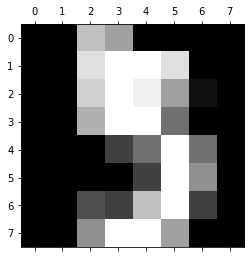

<Figure size 432x288 with 0 Axes>

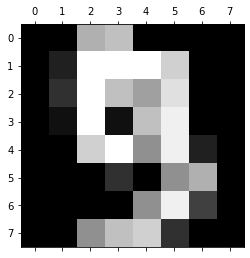

<Figure size 432x288 with 0 Axes>

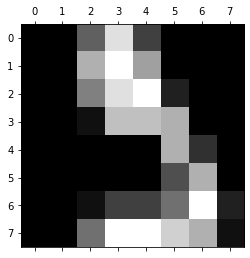

<Figure size 432x288 with 0 Axes>

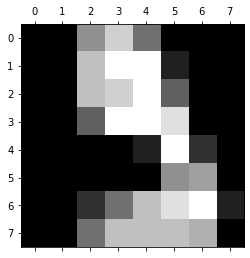

<Figure size 432x288 with 0 Axes>

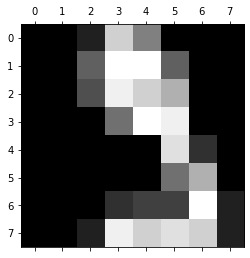

In [ ]:
int_results = np.apply_along_axis(np.argmax, axis = 1, arr = result)

for i in range(10):
  for image in digits.data[np.where(int_results==i)][0:5]:
    plt.gray()
    plt.matshow(image.reshape([8,8]))
    plt.show()